<a href="https://colab.research.google.com/github/JibrilTheUltimateFlugel/TensorflowTest/blob/main/TensorflowCNNfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plot
from keras.datasets import cifar10

In [2]:
(train_img, train_lab), (test_img, test_lab) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_img.shape)
print(test_img.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
train_img = train_img/255.0
test_img = test_img/255.0

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_img,train_lab))
test_dataset = tf.data.Dataset.from_tensor_slices((test_img,test_lab))

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history = model.fit(train_img,train_lab,epochs=10,validation_data=(test_img,test_lab))
model.save('cnnfromscratch.h5')

Epoch 1/10
1563/1563 [==============================] - 43s 9ms/step - loss: 1.7391 - accuracy: 0.3617 - val_loss: 1.2134 - val_accuracy: 0.5739
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1512 - accuracy: 0.5941 - val_loss: 1.0181 - val_accuracy: 0.6437
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0014 - accuracy: 0.6522 - val_loss: 0.9713 - val_accuracy: 0.6613
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9117 - accuracy: 0.6834 - val_loss: 0.8947 - val_accuracy: 0.6944
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8615 - accuracy: 0.6984 - val_loss: 0.8792 - val_accuracy: 0.6952
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8267 - accuracy: 0.7128 - val_loss: 0.8615 - val_accuracy: 0.7088
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7870 - accuracy: 0.7220 - val_loss: 0.8652 - val_ac

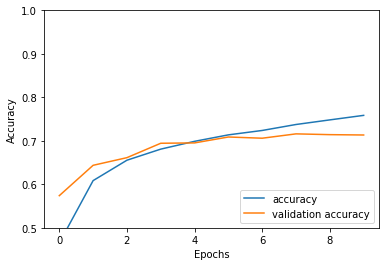

In [ ]:
plot.plot(history.history['accuracy'], label='accuracy') 
plot.plot(history.history['val_accuracy'], label='validation accuracy')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.ylim([0.5,1])
plot.legend(loc = 'lower right')